# SHRIRAM NARENDRA SABADE
# Major Project - Wine Quality Analysis

In [1]:
#importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
#Reading data.
data = pd.read_csv('1767134-1729261-1613779-Red_wine__(1).csv')

In [3]:
#Displaying first five enteries.
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
#Displaying last five enteries.
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.52,0.66,11.0,6.0


In [5]:
#Displaying whole dataset (first five and last five).
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [6]:
#Information about data to detect null values (if any).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [7]:
#Data description
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [8]:
#Dropping null values.
df = data.dropna()

In [9]:
#Detecting null values.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
#Displaying whole dataset after removal of null values.
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [11]:
#Information about data after removal of null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   float64
dtypes: float64(12)
memory usage: 162.1 KB


In [12]:
#figuring out the correlation of every other feature with respect to the quality of the wine.
data.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.475943
sulphates               0.251118
citric acid             0.225867
pH                      0.133961
fixed acidity           0.123987
residual sugar          0.013756
free sulfur dioxide    -0.050899
chlorides              -0.129011
density                -0.174741
total sulfur dioxide   -0.184699
volatile acidity       -0.390258
Name: quality, dtype: float64

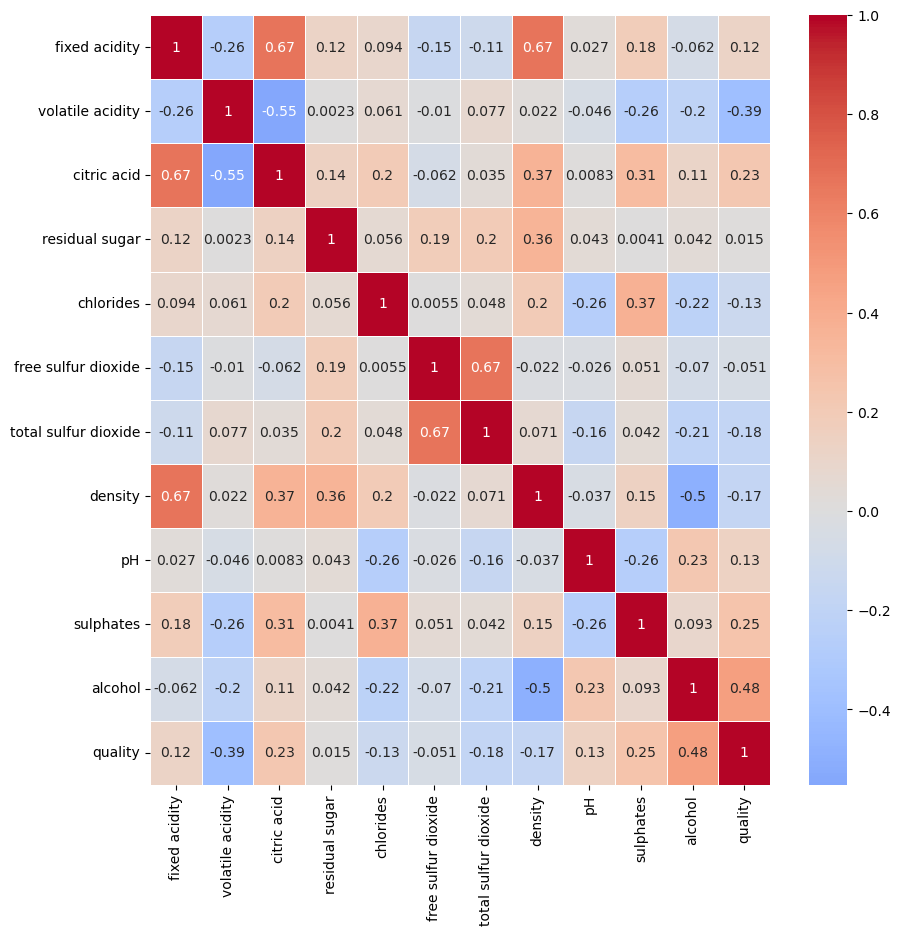

In [13]:
#Heatmap of correlation matrix.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

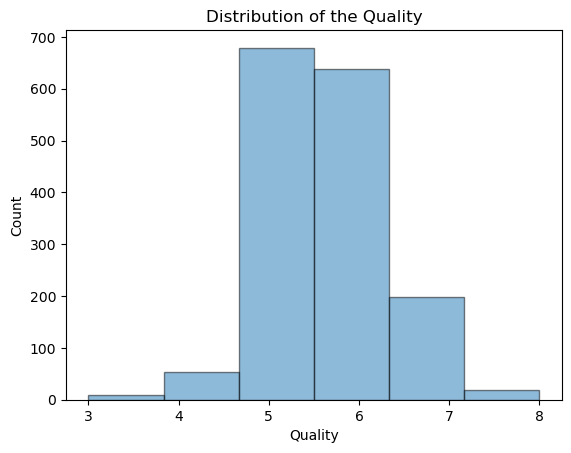

In [14]:
#Distribution of Quality of wine.
plt.hist(df.quality,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

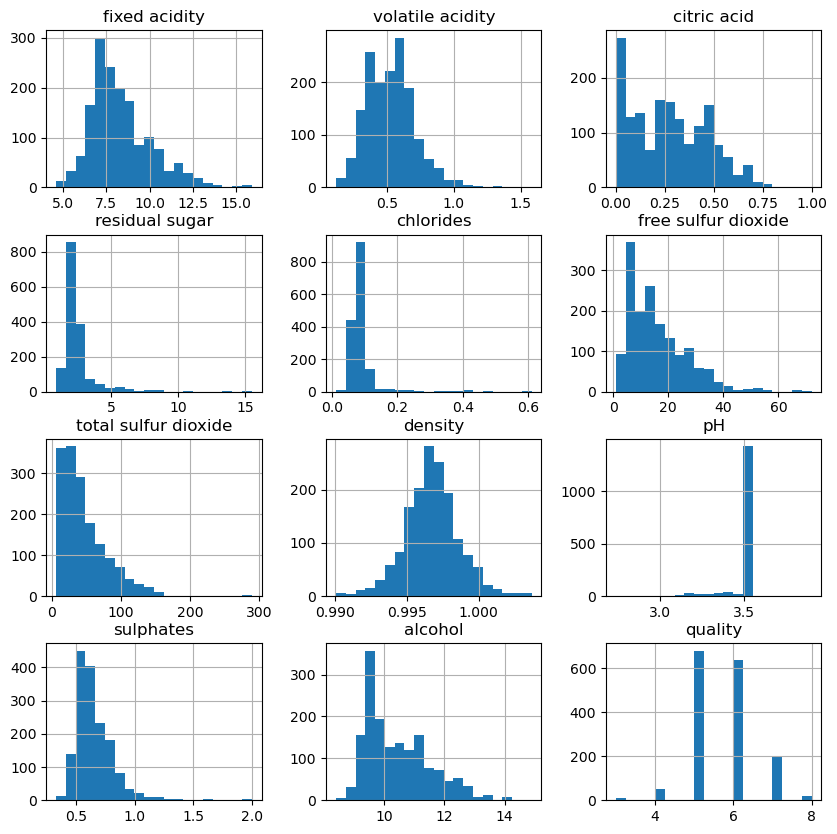

In [15]:
#Distribution of various variables of dataset.
df.hist(bins=20, figsize=(10, 10))
plt.show()

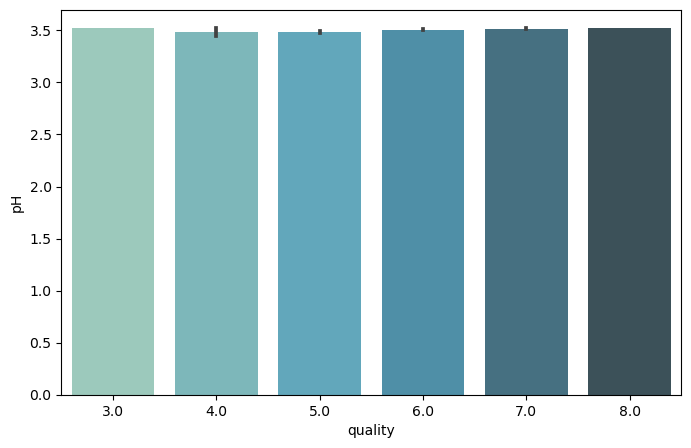

In [16]:
#Barplot of Quality vs pH 
plt.figure(figsize=(8,5))
sns.barplot(x=df.quality,y=df.pH,palette="GnBu_d")
plt.show()

<b>From the barplot of quality vs ph we can visualize that there is a slight decrease in pH with the increase in quality of the wine</b>

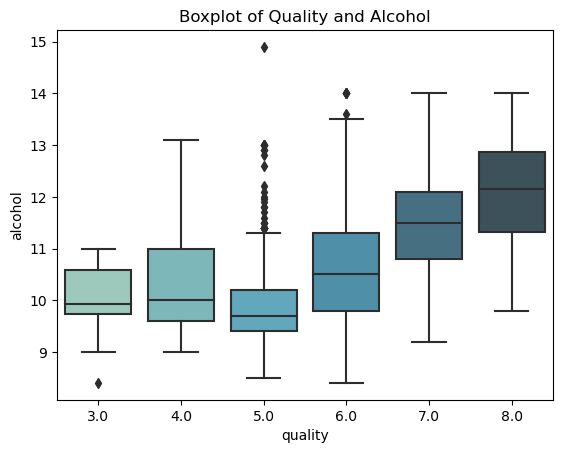

In [17]:
#Boxplot of Quality & Alcohol
ax = sns.boxplot(x='quality',y='alcohol',data=df,palette='GnBu_d')
plt.title("Boxplot of Quality and Alcohol")
plt.show()

<b>The above plot shows the increase in the quality of wine with the increase in alcohol.</b>

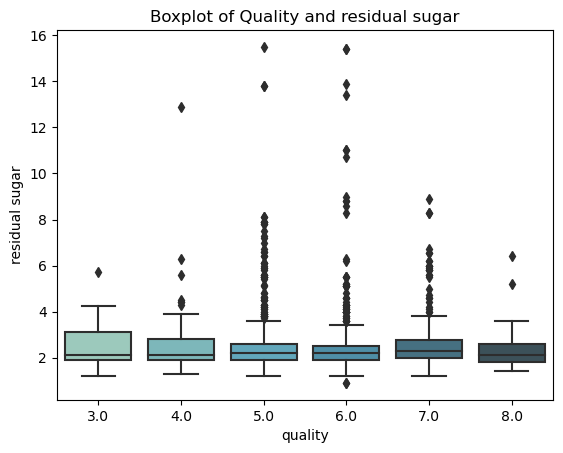

In [18]:
#Boxplot of Quality & Residual sugar 
sns.boxplot(x="quality",y="residual sugar",data=df,palette="GnBu_d")
plt.title("Boxplot of Quality and residual sugar")
plt.show()

<b>There is not much effect of the residual sugar on the quality of the wine.</b>

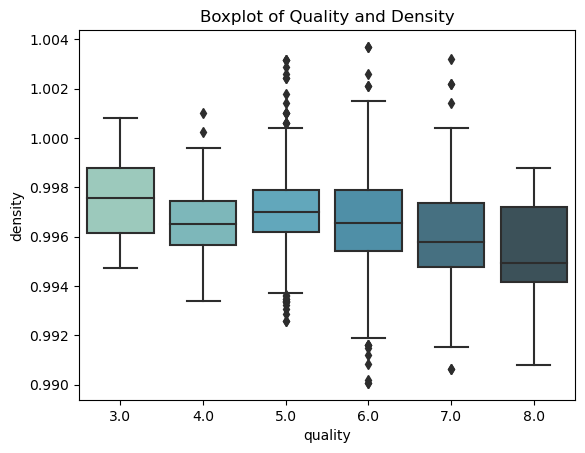

In [19]:
#Boxplot of Quality & Density
sns.boxplot(x="quality",y="density",data=df,palette="GnBu_d")
plt.title("Boxplot of Quality and Density")
plt.show()

<b>From the above boxplot we can visualize that the quality of wine increases with decrease in density.</b>

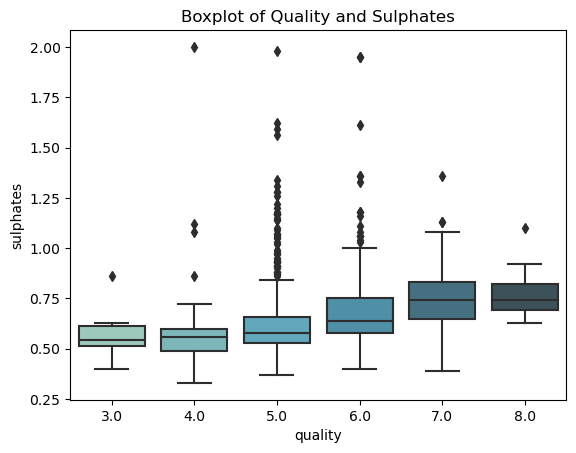

In [20]:
#Boxplot of Quality & Sulphates
sns.boxplot(x="quality",y="sulphates",data=df,palette="GnBu_d")
plt.title("Boxplot of Quality and Sulphates")
plt.show()

<b>Quality of alcohol increases with the increase in the amount of sulphates in the wine.</b>

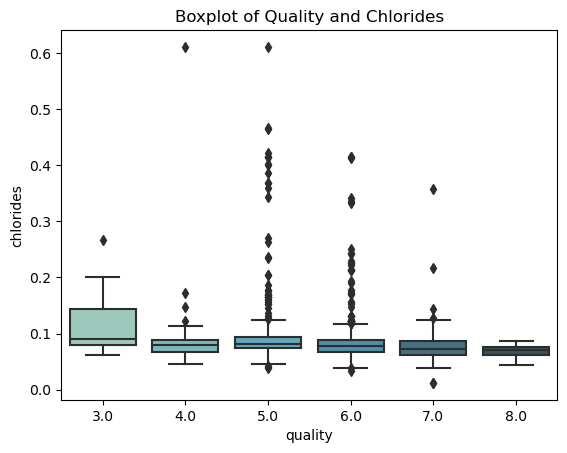

In [21]:
#Boxplot of Quality & Chlorides
sns.boxplot(x="quality",y="chlorides",data=df,palette="GnBu_d")
plt.title("Boxplot of Quality and Chlorides")
plt.show()

<b>There is not even a slight change in the quality of wine for a particular amount of chlorides mixed in them.</b>

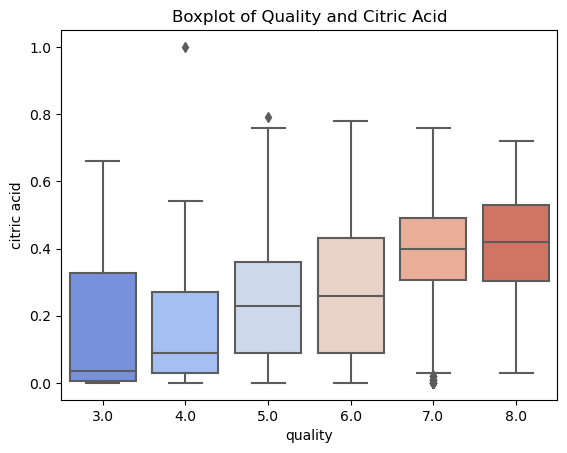

In [22]:
#Boxplot of Quality & Citric Acid
sns.boxplot(x="quality",y="citric acid",data=df,palette="coolwarm")
plt.title("Boxplot of Quality and Citric Acid")
plt.show()

<b>The quality of the wine increases with increase in the amount of citric acid in the wine.</b>

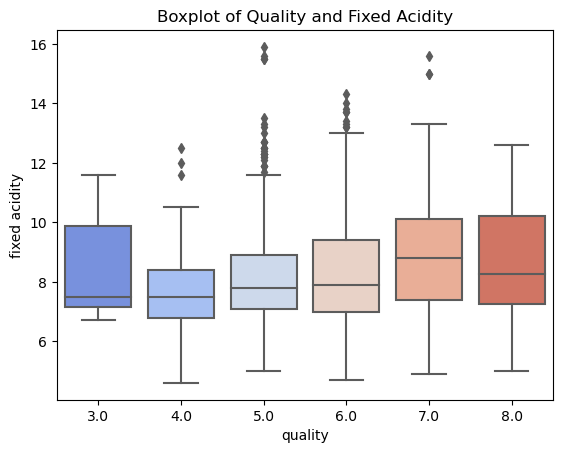

In [23]:
#"Boxplot of Quality & Fixed Acidity"
sns.boxplot(x="quality",y="fixed acidity",data=df,palette="coolwarm")
plt.title("Boxplot of Quality and Fixed Acidity")
plt.show()

<b>There is not much effect of fixed acidity on the quality of the wine.</b>

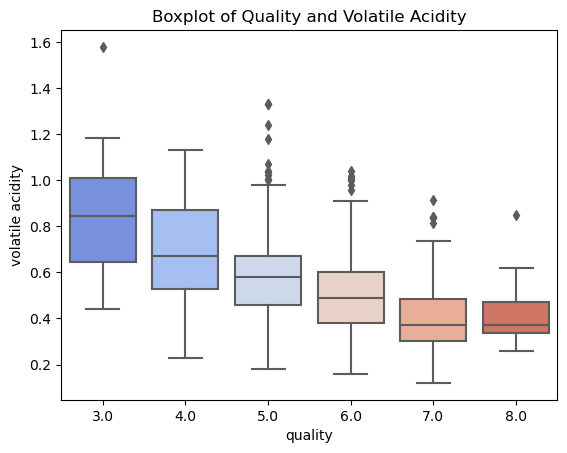

In [24]:
#Boxplot of Quality & Volatile Acidity
sns.boxplot(x="quality",y="volatile acidity",data=data,palette="coolwarm")
plt.title("Boxplot of Quality and Volatile Acidity")
plt.show()

<b>Quality of wine increases with the decrease in the amount of volatile acids.</b>

# Model Development

In [25]:
df['best quality'] = [1 if x>5 else 0 for x in df.quality]

C:\Users\SABADE\AppData\Local\Temp\ipykernel_7412\2727872248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['best quality'] = [1 if x>5 else 0 for x in df.quality]


In [26]:
df.replace({'white': 1, 'red': 0}, inplace=True)

C:\Users\SABADE\AppData\Local\Temp\ipykernel_7412\2658418495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'white': 1, 'red': 0}, inplace=True)


In [27]:
#Spliting dataset into 80:20 ratio for model selection.
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)
xtrain.shape, xtest.shape

((1276, 11), (320, 11))

In [28]:
#Normalising the data before training.
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [29]:
#Training models
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
for i in range(3):
    models[i].fit(xtrain, ytrain)
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.7497380908362605
Validation Accuracy :  0.7453544118229722

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.811541661714014

SVC() : 
Training Accuracy :  0.7691575768780428
Validation Accuracy : 

<b>Logistic Regression and SVC() classifier performing better on the validation data with less difference between the validation and training data.</b>

C:\Users\SABADE\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


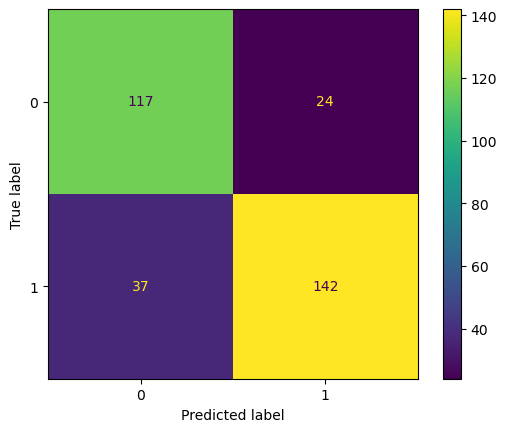

In [30]:
#Model Evaluation
metrics.plot_confusion_matrix(models[1], xtest, ytest)
plt.show()

In [31]:
#Classification Report for best model
print(metrics.classification_report(ytest,models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       141
           1       0.86      0.79      0.82       179

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320

